#FIXED

### EXPORT AS PKL

In [5]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Capstone Project/dataset_lokasi(1).csv'

# Load and preprocess data
df = pd.read_csv(file_path)

# Select relevant features
data_model = df[['Place_Name','City','Images','Price','Rating','Lat','Long','Category','Description','Hotel']].copy()  # create a copy to avoid SettingWithCopyWarning

# Rescale the ratings to be between 1 and 5
data_model['Rating'] = data_model['Rating'].apply(lambda x: round(x/2) if x <= 10 else 5)

# Handle duplicates and missing data
data_model.drop_duplicates(inplace=True)
data_model.dropna(inplace=True)

# Split into features and target 'and hotel'
X = df[['City','Price','Hotel']]
y = df['Rating']

# Convert City to one-hot encoding
X = pd.get_dummies(X, columns=['City','Hotel'])

# Convert y to categorical
y = tf.keras.utils.to_categorical(y-1, num_classes=5)

# Split into train, test, and validation sets (50% train, 20% validation, 30% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.2/0.7), random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu')),
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Save the model and scaler for future use
model.save('model.h5')  # Save the model in h5 format
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  # Save the scaler


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 2.3135 - accuracy: 0.0047 - val_loss: 1.5930 - val_accuracy: 0.3333
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1.8411 - accuracy: 0.1028 - val_loss: 1.3921 - val_accuracy: 0.7356
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.4621 - accuracy: 0.2804 - val_loss: 1.2154 - val_accuracy: 0.8621
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 1.1638 - accuracy: 0.5047 - val_loss: 1.0542 - val_accuracy: 0.9310
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.9220 - accuracy: 0.7710 - val_loss: 0.9059 - val_accuracy: 0.9425
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7276 - accuracy: 0.8925 - val_loss: 0.7701 - val_accuracy: 0.9540
Epoch 7/100
7/7 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


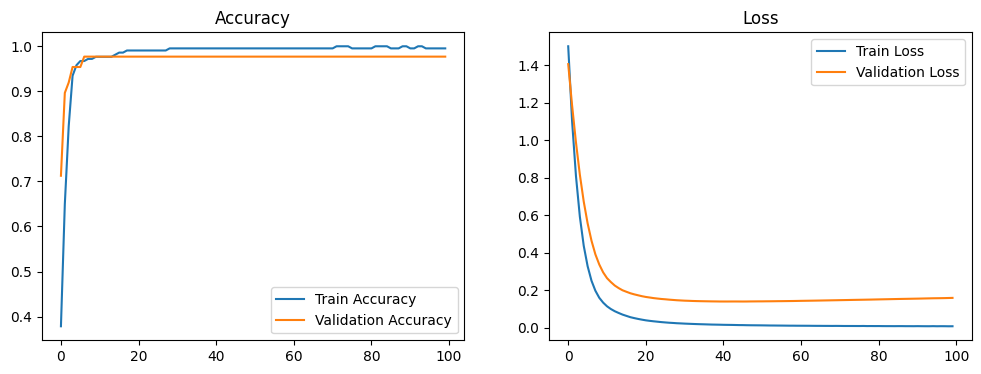

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

### EXPORT AS H5

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Capstone Project/dataset_lokasi(1).csv'

# Load and preprocess data
df = pd.read_csv(file_path)

# Select relevant features
data_model = df[['Place_Name','City','Images','Price','Rating','Lat', 'Long','Category','Description','Hotel']].copy()  # create a copy to avoid SettingWithCopyWarning

# Rescale the ratings to be between 1 and 5
data_model['Rating'] = data_model['Rating'].apply(lambda x: round(x/2) if x <= 10 else 5)

# Handle duplicates and missing data
data_model.drop_duplicates(inplace=True)
data_model.dropna(inplace=True)

# Split into features and target 'and hotel'
X = df[['City','Price','Hotel']]
y = df['Rating']

# Convert City to one-hot encoding
X = pd.get_dummies(X, columns=['City','Hotel'])

# Convert y to categorical
y = tf.keras.utils.to_categorical(y-1, num_classes=5)

# Split into train, test, and validation sets (50% train, 20% validation, 30% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.2/0.7), random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print('Train Accuracy: ', max(history.history['accuracy']))
print('Validation Accuracy: ', max(history.history['val_accuracy']))
print('Train Loss: ', min(history.history['loss']))
print('Validation Loss: ', min(history.history['val_loss']))

# Save the model and scaler for future use
data_model.to_hdf('processed_dataset_lokasi.h5', key='df', mode='w')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the data for future reference
data_model.to_csv('processed_dataset_lokasi.csv', index=False)



Mounted at /content/drive
Epoch 1/100
7/7 [==============================] - 1s 42ms/step - loss: 1.6175 - accuracy: 0.1636 - val_loss: 1.4703 - val_accuracy: 0.6552
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 1.3401 - accuracy: 0.4393 - val_loss: 1.3353 - val_accuracy: 0.8621
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.1291 - accuracy: 0.6589 - val_loss: 1.2088 - val_accuracy: 0.8851
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.9456 - accuracy: 0.8364 - val_loss: 1.0834 - val_accuracy: 0.9425
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7850 - accuracy: 0.9252 - val_loss: 0.9588 - val_accuracy: 0.9655
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6392 - accuracy: 0.9626 - val_loss: 0.8357 - val_accuracy: 0.9770
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5153 - accuracy: 0.9813 - val_loss: 0.7168 - val_accuracy: 0.977

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Contoh model Sequential dengan CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

# Mengompilasi model (Opsional)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Memuat berat (weights) ke dalam model (Opsional)
model.load_weights('model.h5')  # Ganti 'nama_file_berat_model.h5' dengan nama file berat model Anda

# Mengeluarkan output dari model menggunakan data tes (contoh)
# Ganti X_test dengan data tes Anda
output = model.predict(X_test)

# Output adalah prediksi yang dihasilkan oleh model terhadap data tes
# Anda dapat menggunakan output ini untuk evaluasi lebih lanjut atau tujuan lainnya


ValueError: ignored